# Étude en comparaison avec les taux d'intérêt swaption

On étudie ici le rapport $\frac{volatilité ~ observée ~au~ temps~ t}{taux~ d'intérêt ~au~ temps ~t}$

In [2]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from datetime import datetime

input = pd.read_csv('Databases/comp_interet.csv', delimiter = ";")
input.fillna(0, inplace=True)
input['Date'] = pd.to_datetime(input['Date'],dayfirst=True)

output2 = pd.read_csv('Databases/Scenarios_01082007.csv', delimiter = ";", decimal=",")
output2.fillna(0, inplace=True)
output3 = pd.read_csv('Databases/Scenarios_30072014.csv', delimiter = ";", decimal=",")
output3.fillna(0, inplace=True)
#supprimer la dernière ligne
liste = output2.columns
vols = liste[2:11]
rates = liste[11:]

In [3]:
input3 = input[95:]
swaps = input.columns[1:]

#input.groupby(input.Date,by=[input.Date.month,input.Date.year]).mean
#input['date_minus_time'] = input["Date"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day)) 
#input.set_index(input["date_minus_time"],inplace=True)
input=input.groupby([input.Date.dt.year,input.Date.dt.month]).mean()

In [4]:
rng3 = pd.date_range('07/30/2014', periods=21, freq='M')
print(rng3)

DatetimeIndex(['2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='M')


In [5]:
input3 = pd.DataFrame()
for swap in swaps:
    input3[swap] = input[swap][21:].values
input3['Date']=rng3

In [6]:
out2 = pd.DataFrame()
out3 = pd.DataFrame()

for vol,rate,swap in zip(vols,rates,swaps):
    output2[swap]=100*output2[vol]/output2[rate]
    output3[swap]=100*output3[vol]/output3[rate]

for swap in swaps:
    out2[swap] = output2[swap].groupby(output2.Timestep).mean()
    out3[swap] = output3[swap].groupby(output3.Timestep).mean()

out3=out3[0:21]

out3['Date']=rng3

In [7]:
recap_in = pd.DataFrame()
recap_out = pd.DataFrame()

for swap in swaps :
    recap_in = recap_in.append(input3[swap].describe(percentiles = [.05, .25, .5, .75, .95]))
    recap_out = recap_out.append(out3[swap].describe(percentiles = [.05, .25, .5, .75, .95]))
print("Input : ")
print(recap_in)
print("")
print("Output :")
print(recap_out)

Input : 
                25%         5%         50%         75%         95%  count  \
EUPG15    81.602353  56.719735  122.826971  241.256190  450.320824   21.0   
EUPG110   37.369247  21.350174   48.805397   69.473416  127.173324   21.0   
EUPG120   19.366559  11.865520   28.235051   38.200644   84.148508   21.0   
EUPG55    22.027325  16.139210   28.362359   36.901455   84.417434   21.0   
EUPG510   17.985909  11.912412   21.848789   27.419994   70.660560   21.0   
EUPG520   14.231714  10.335026   19.065830   26.722412   62.807613   21.0   
EUPG105   13.880983   9.408576   16.011305   22.874247   56.472163   21.0   
EUPG1010  13.369679   9.446388   16.812513   24.439309   58.277822   21.0   
EUPG1020  12.570144   9.218013   17.895811   24.263701   52.766687   21.0   

                  max        mean  min         std  
EUPG15    1139.050888  206.786438  0.0  239.025253  
EUPG110    135.003440   56.905520  0.0   35.429929  
EUPG120     87.254141   33.379813  0.0   22.040101  
EUPG55  

Bleu : input
Rouge : output
EUPG15


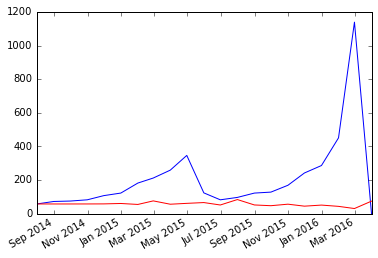

EUPG110


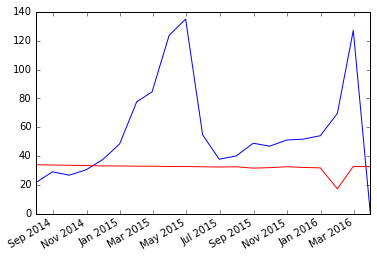

EUPG120


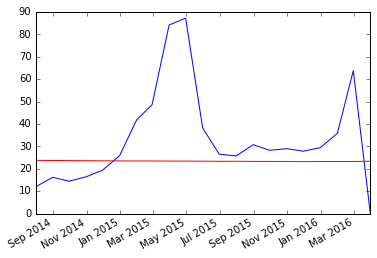

EUPG55


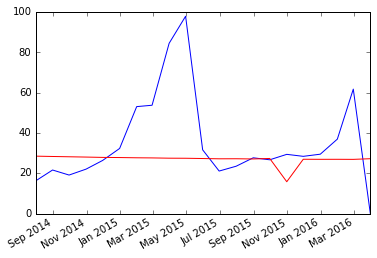

EUPG510


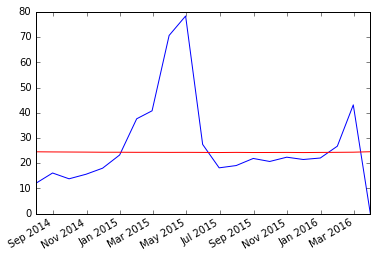

EUPG520


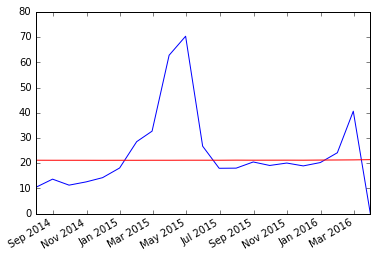

EUPG105


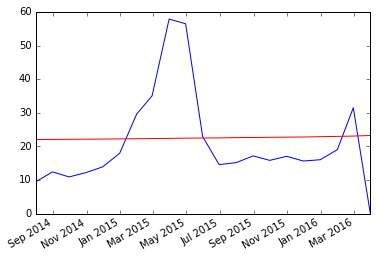

EUPG1010


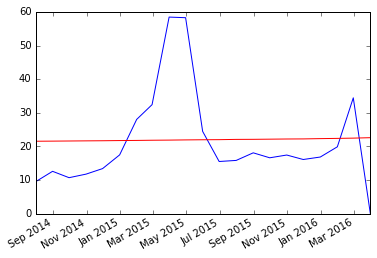

EUPG1020


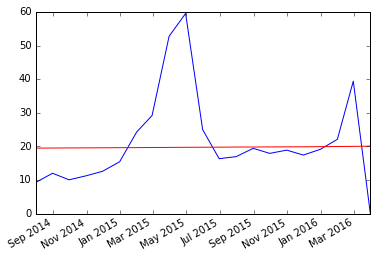

In [8]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']
print("Bleu : input")
print("Rouge : output")

for swap in swaps :
    print(str(swap))
    fig, ax = plt.subplots()
    ax.plot_date(input3['Date'], input3[swap],'-',color='BLUE')
    ax.plot_date(out3['Date'], out3[swap],'-',color='RED')
    fig.autofmt_xdate()
    plt.show()

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 1, 5, Normal, 0)


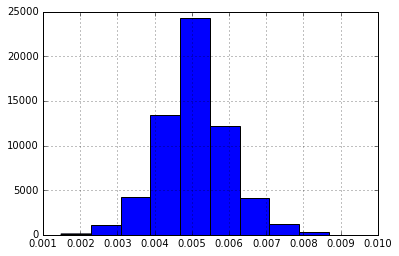

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 1, 10, Normal, 0)


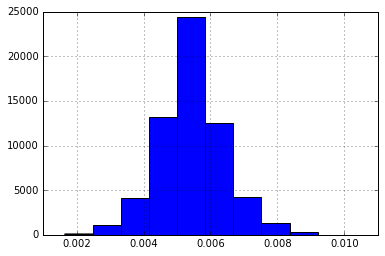

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 1, 20, Normal, 0)


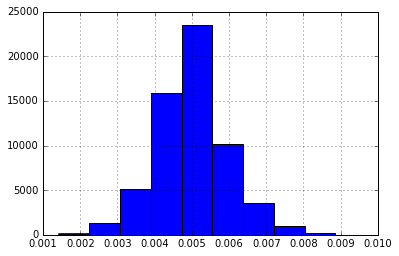

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 5, 5, Normal, 0)


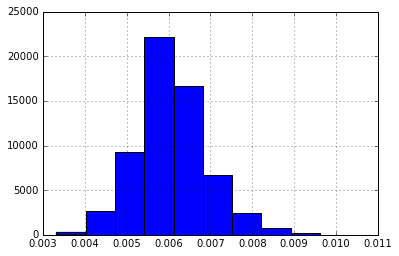

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 5, 10, Normal, 0)


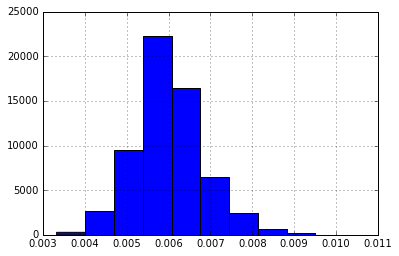

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 5, 20, Normal, 0)


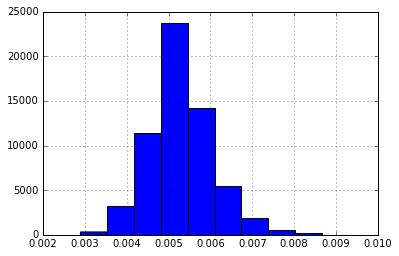

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 10, 5, Normal, 0)


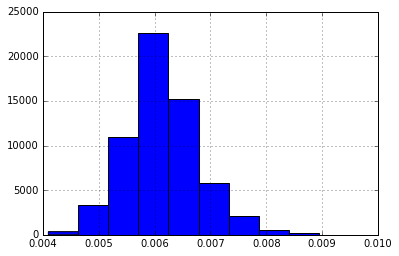

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 10, 10, Normal, 0)


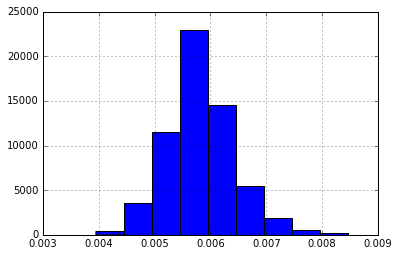

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,SwaptionImpliedVolatility(Payer, ForwardStrike1, 1, 10, 20, Normal, 0)


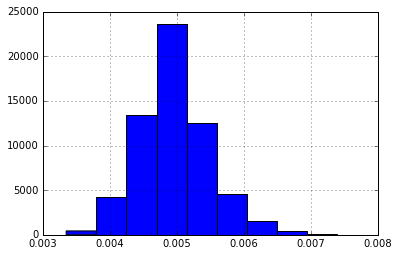

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(1, 5, 1)


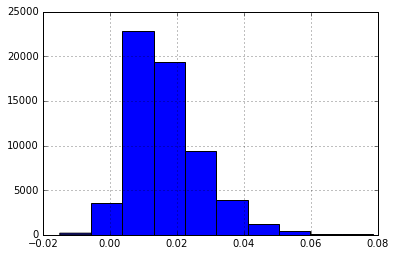

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(1, 10, 1)


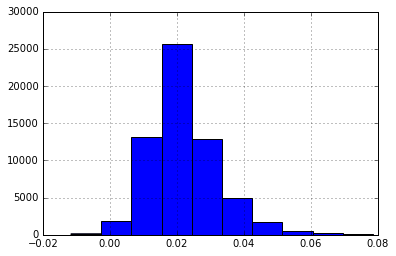

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(1, 20, 1)


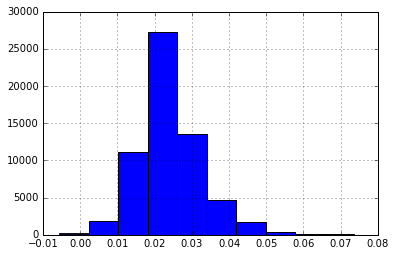

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(5, 5, 1)


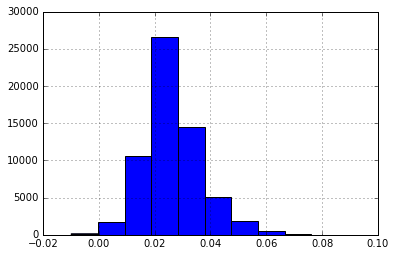

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(5, 10, 1)


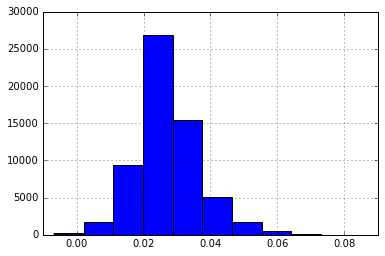

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(5, 20, 1)


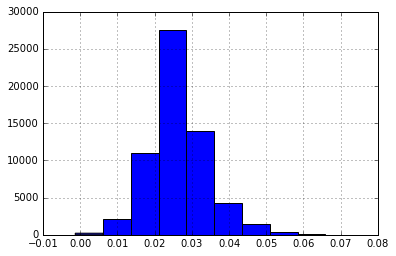

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(10, 5, 1)


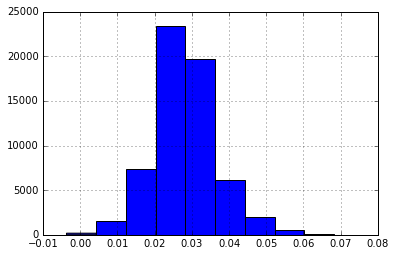

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(10, 10, 1)


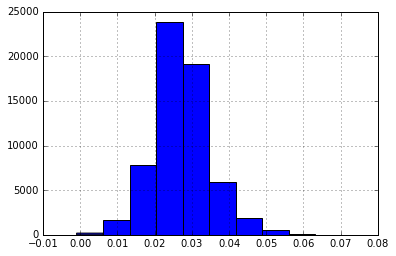

ESG,Economies,EUR,NominalYieldCurves,NominalYieldCurve,ForwardSwapRate(10, 20, 1)


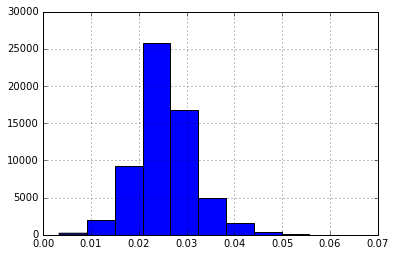

EUPG15


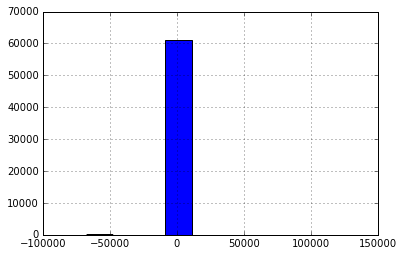

EUPG110


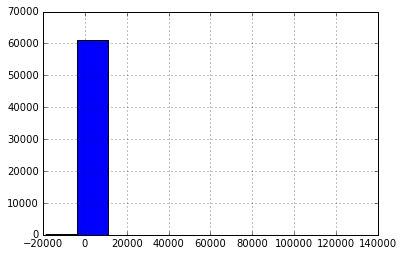

EUPG120


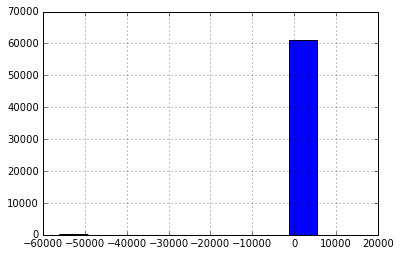

EUPG55


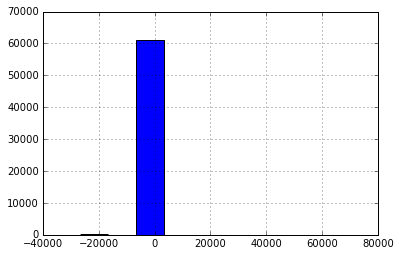

EUPG510


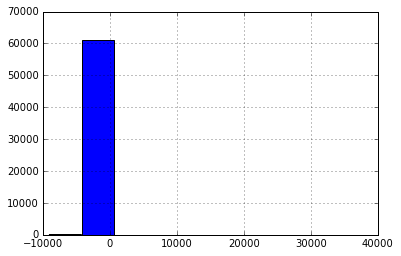

EUPG520


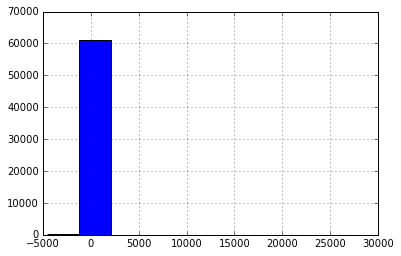

EUPG105


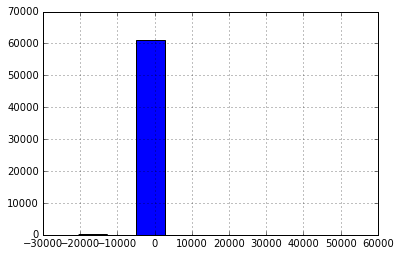

EUPG1010


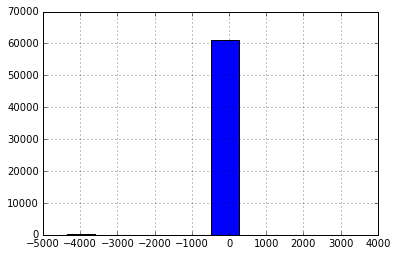

EUPG1020


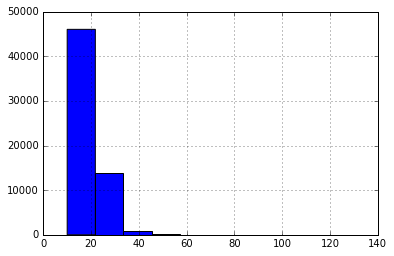

In [9]:
#augmenter précision
def hist(table):
    for i, elem in enumerate(table) :
        if i>1:
            print(str(elem))
            table[elem].hist()
            plt.show()
hist(output3)

In [6]:
def loi(table,loi='norm'):
    for i, elem in enumerate(table) :
        if i>0:
            test,p=stats.kstest(table[elem], loi)
            if p<0.05:
                print(str(elem)," ne suit pas une loi ",loi)
                
loi(table,'expon')
loi(table)

EUPG15  ne suit pas une loi  expon
EUPG110  ne suit pas une loi  expon
EUPG120  ne suit pas une loi  expon
EUPG55  ne suit pas une loi  expon
EUPG510  ne suit pas une loi  expon
EUPG520  ne suit pas une loi  expon
EUPG105  ne suit pas une loi  expon
EUPG1010  ne suit pas une loi  expon
EUPG1020  ne suit pas une loi  expon
EUPG15  ne suit pas une loi  norm
EUPG110  ne suit pas une loi  norm
EUPG120  ne suit pas une loi  norm
EUPG55  ne suit pas une loi  norm
EUPG510  ne suit pas une loi  norm
EUPG520  ne suit pas une loi  norm
EUPG105  ne suit pas une loi  norm
EUPG1010  ne suit pas une loi  norm
EUPG1020  ne suit pas une loi  norm


Comme indiqué précedemment, on observe une forte corrélation entre les trajectoires des différents swaptions. On applique donc un test du khi-2 pour voir si les distributions suivent une même loi

In [22]:
ans = pd.DataFrame(index=['EUPG15' 'EUPG110' 'EUPG120' 'EUPG55' 'EUPG510' 'EUPG520' 'EUPG105'
 'EUPG1010' 'EUPG1020'],columns=['EUPG15' 'EUPG110' 'EUPG120' 'EUPG55' 'EUPG510' 'EUPG520' 'EUPG105'
 'EUPG1010' 'EUPG1020'])
def corr(table):
    for i, elem in enumerate(table) :
        for j, ele in enumerate(table) :
            if i>0 and j>0 and i<j:
                test,p=stats.ks_2samp(table[elem], table[ele])
                if p<0.05:
                    pass
                    #print(str(elem),' et ',str(ele),' ne suivent pas la même loi')
                else : 
                    print(str(elem),' et ',str(ele),' suivent la même loi, (p-valeur = ',p,')')
                    fig, ax = plt.subplots()
                    print(str(elem),' : ',colors[1])
                    print(str(ele),' : ',colors[2])
                    ax.plot_date(table['Date'], table[elem],'-',color=colors[1])
                    ax.plot_date(table['Date'], table[ele],'-',color=colors[2])
                    fig.autofmt_xdate()
                    plt.show()

corr(output3)